<a href="https://colab.research.google.com/github/GayathriShrikanth/Brain-Tumour-Detection-and-classification/blob/master/Brain_Tumor_Perfect_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import numpy as np 
import pandas as pd 
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
print(os.listdir("../input"))
import torchvision.models as models

['no', 'brain_tumor_dataset', 'yes']


# Make Data

In [0]:
DATA_DIR='../input/brain_tumor_dataset'

In [0]:
os.listdir(f'{DATA_DIR}')

['no', 'yes']

In [0]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.25,
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  size=224,bs=24, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')

Classes: 
 ['no', 'yes']


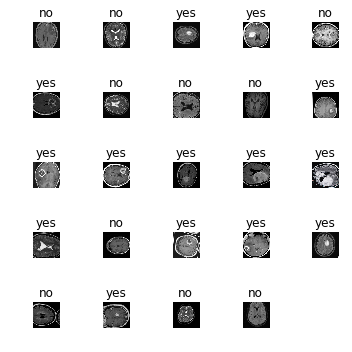

In [0]:
data.show_batch(rows=10, figsize=(5,5))

In [0]:
learner = create_cnn(data, models.vgg16, metrics=[accuracy], callback_fns=ShowGraph,  model_dir="/tmp/model/")

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(15, max_lr=slice(1e-2))

In [0]:
learner.save('/kaggle/working/stage-1')

In [0]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


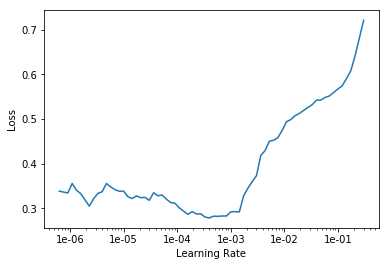

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.load('/kaggle/working/stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (190 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no,no,no,no,no
Path: ../input/brain_tumor_dataset;

Valid: LabelList (63 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no,yes,yes,no,yes
Path: ../input/brain_tumor_dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (

epoch,train_loss,valid_loss,accuracy,time
0,0.302036,0.038451,1.000000,03:04
1,0.299327,0.037346,1.000000,03:01
2,0.323480,0.040194,0.984127,03:16
3,0.294442,0.035387,1.000000,03:05
4,0.307581,0.035635,0.984127,03:04
5,0.327095,0.036309,0.984127,03:02
6,0.320274,0.033641,1.000000,03:02
7,0.316040,0.035161,0.984127,03:02
8,0.321303,0.034549,1.000000,03:04
9,0.315197,0.036138,1.000000,03:02


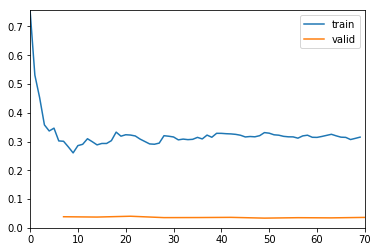

In [0]:
learner.fit_one_cycle(10, max_lr=slice(1e-05))

In [0]:
learner.save('/kaggle/working/stage-2')

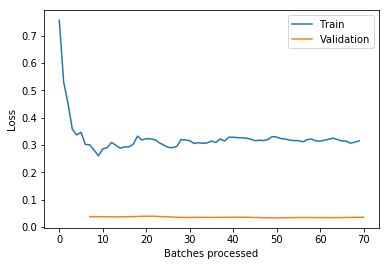

In [0]:
learner.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

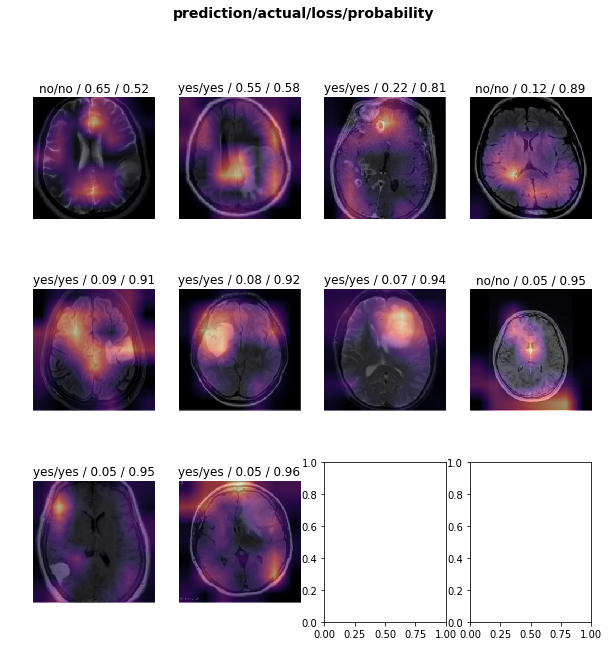

In [0]:
interp.plot_top_losses(10, figsize=(10,10))

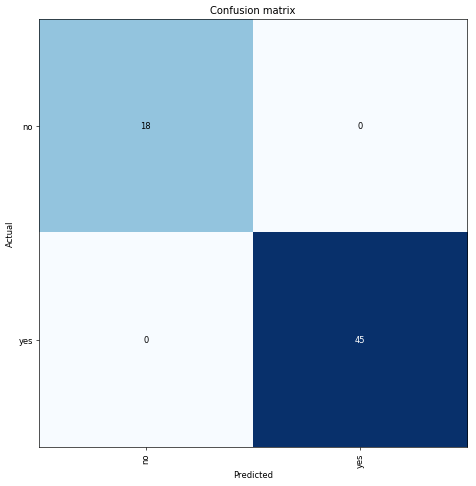

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)